In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

text = """Cricket is one of my favorite sports to watch.I have acquired this love for sports from my father.We watch the IPL together every year.It's competitive and that's what makes it fun
"""
clean_text = re.sub(r"[^\w\s']", "", text.lower())
words_nltk = word_tokenize(clean_text)
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_nltk if w not in stop_words and len(w) > 1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top 10 Terms: [('sports', 2), ("'s", 2), ('cricket', 1), ('one', 1), ('favorite', 1), ('watchi', 1), ('acquired', 1), ('love', 1), ('fatherwe', 1), ('watch', 1)]


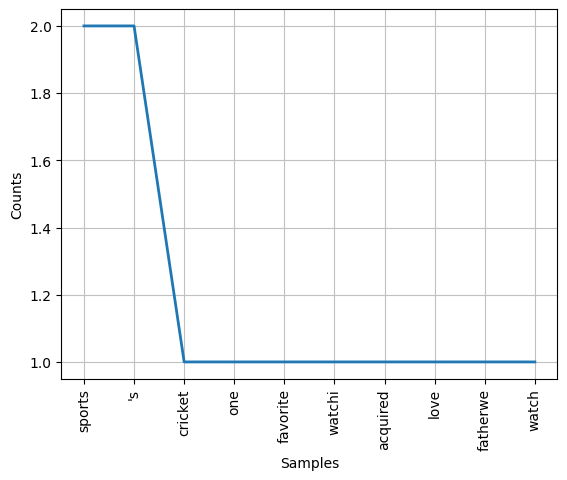

In [5]:
fdist = FreqDist(filtered_words)
print("Top 10 Terms:", fdist.most_common(10))
fdist.plot(10)
plt.show()

In [11]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
#Q2
alphabets=re.findall(r'\b[a-zA-Z]+\b',text)
stop_words= set(stopwords.words('english'))
filtered_words=[w for w in words_nltk if w.lower() not in stop_words]
print("filtered words:",filtered_words)
ps=PorterStemmer()
stemmed= [ps.stem(word) for word in filtered_words]
print("stemmed word:",stemmed)

filtered words: ['cricket', 'one', 'favorite', 'sports', 'watchi', 'acquired', 'love', 'sports', 'fatherwe', 'watch', 'ipl', 'together', 'every', 'yearit', "'s", 'competitive', "'s", 'makes', 'fun']
stemmed word: ['cricket', 'one', 'favorit', 'sport', 'watchi', 'acquir', 'love', 'sport', 'fatherw', 'watch', 'ipl', 'togeth', 'everi', 'yearit', "'s", 'competit', "'s", 'make', 'fun']
lemmatized word: ['cricket', 'one', 'favorite', 'sport', 'watchi', 'acquired', 'love', 'sport', 'fatherwe', 'watch', 'ipl', 'together', 'every', 'yearit', "'s", 'competitive', "'s", 'make', 'fun']
cricket  → Stem: cricket  | Lemma: cricket
one      → Stem: one      | Lemma: one
favorite → Stem: favorit  | Lemma: favorite
sports   → Stem: sport    | Lemma: sport
watchi   → Stem: watchi   | Lemma: watchi
acquired → Stem: acquir   | Lemma: acquired
love     → Stem: love     | Lemma: love
sports   → Stem: sport    | Lemma: sport
fatherwe → Stem: fatherw  | Lemma: fatherwe
watch    → Stem: watch    | Lemma: watch


In [13]:
lm=WordNetLemmatizer()
lemmatized=[lm.lemmatize(word) for word in filtered_words]
print("lemmatized word:",lemmatized)
comparison = list(zip(filtered_words, stemmed, lemmatized))
for original, stem, lemma in comparison:
    print(f"{original:8} → Stem: {stem:8} | Lemma: {lemma}")

lemmatized word: ['cricket', 'one', 'favorite', 'sport', 'watchi', 'acquired', 'love', 'sport', 'fatherwe', 'watch', 'ipl', 'together', 'every', 'yearit', "'s", 'competitive', "'s", 'make', 'fun']
cricket  → Stem: cricket  | Lemma: cricket
one      → Stem: one      | Lemma: one
favorite → Stem: favorit  | Lemma: favorite
sports   → Stem: sport    | Lemma: sport
watchi   → Stem: watchi   | Lemma: watchi
acquired → Stem: acquir   | Lemma: acquired
love     → Stem: love     | Lemma: love
sports   → Stem: sport    | Lemma: sport
fatherwe → Stem: fatherw  | Lemma: fatherwe
watch    → Stem: watch    | Lemma: watch
ipl      → Stem: ipl      | Lemma: ipl
together → Stem: togeth   | Lemma: together
every    → Stem: everi    | Lemma: every
yearit   → Stem: yearit   | Lemma: yearit
's       → Stem: 's       | Lemma: 's
competitive → Stem: competit | Lemma: competitive
's       → Stem: 's       | Lemma: 's
makes    → Stem: make     | Lemma: make
fun      → Stem: fun      | Lemma: fun


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "Maths is a very interesting subject.",
    "The odds of winning thisare minimal.",
    "There are many branches in engineering"
]

cv = CountVectorizer()
bow = cv.fit_transform(texts)

In [16]:
tfidf = TfidfVectorizer().fit(texts)
tfidf_matrix = tfidf.transform(texts)
feature_names = tfidf.get_feature_names_out()

for i, doc in enumerate(texts):
    doc_scores = tfidf_matrix[i].toarray()[0]
    word_scores = list(zip(feature_names, doc_scores))
    top_keywords = sorted(word_scores, key=lambda x: x[1], reverse=True)[:3]
    print(f"Text {i+1} top keywords:", [word for word,score in top_keywords])

Text 1 top keywords: ['interesting', 'is', 'maths']
Text 2 top keywords: ['minimal', 'odds', 'of']
Text 3 top keywords: ['are', 'branches', 'engineering']


In [18]:
#Q4
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize

ai_text = "AI learns from data patterns using neural networks. It enables predictive analytics. Deep learning improves image recognition."
blockchain_text = "Blockchain creates tamper-proof transaction records. It uses decentralized ledgers. Cryptography secures all blockchain data."

def jaccard_sim(a, b):
    a_set = set(word_tokenize(a.lower()))
    b_set = set(word_tokenize(b.lower()))
    return len(a_set & b_set) / len(a_set | b_set)

tfidf = TfidfVectorizer().fit_transform([ai_text, blockchain_text])

print(f"Jaccard Similarity: {jaccard_sim(ai_text, blockchain_text):.2f}")
print(f"Cosine Similarity: {cosine_similarity(tfidf[0:1], tfidf[1:2])[0][0]:.2f}")

Jaccard Similarity: 0.10
Cosine Similarity: 0.06


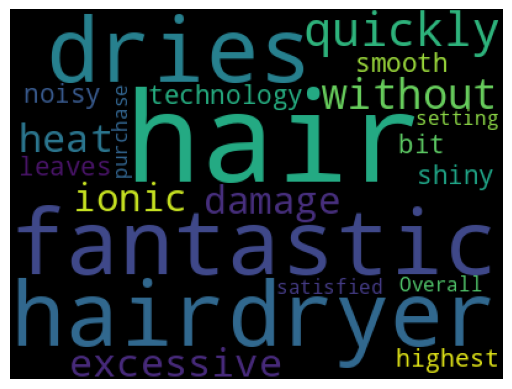

Polarity: 0.27
Sentiment: Positive


In [19]:
#Q5
review = """This hairdryer is fantastic! It dries my hair quickly without excessive heat damage.
The ionic technology leaves my hair smooth and shiny. However, it's a bit noisy at the highest setting.
Overall, I'm very satisfied with this purchase."""
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

blob = TextBlob(review)
polarity = blob.sentiment.polarity
sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"

wc = WordCloud(width=400, height=300).generate(review)
plt.imshow(wc)
plt.axis("off")
plt.show()

print(f"Polarity: {polarity:.2f}")
print(f"Sentiment: {sentiment}")

In [22]:
#q6
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical

movie_paragraph = """Inception is a mind-bending sci-fi thriller about dream infiltration.
The Dark Knight revolutionized superhero movies with its gritty realism.
Pulp Fiction's non-linear storytelling became iconic in cinema history.
Interstellar explored theoretical physics through emotional space exploration.
The Shawshank Redemption remains the highest-rated drama about hope and perseverance."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([movie_paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in movie_paragraph.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
X = input_sequences[:,:-1]
y = to_categorical(input_sequences[:,-1], num_classes=total_words)

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=1)

def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

print(generate_text("Inception is", 5))
print(generate_text("The Shawshank", 3))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.0000e+00 - loss: 3.8933
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1744 - loss: 3.8850
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1889 - loss: 3.8786 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1889 - loss: 3.8710
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2428 - loss: 3.8626
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2034 - loss: 3.8539 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1390 - loss: 3.8420
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0996 - loss: 3.8237 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0747 - loss: 3.7994
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0498 - loss: 3.7690
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0643 - loss: 3.7319
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.06